<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Máquinas de Aprendizaje II-2018 </h1>

<H3 align='center'> Tarea 3 - Ensamblados y modelos avanzados </H3>
<hr style="height:2px;border:none"/>

* Cristian Aguilar
* Anibal Palomo
 
**Temas**  
* Técnicas de ensamblado: *bagging*, *boosting*, *random forest*.
* Redes Neuronales Convolucionales vs *Feed Forward*
* Aprendizaje no supervisado: *hidden models*
* Aprendizaje sobre secuencias
 

## 1. Calidad de un vino

> a) Carge los dos dataset en un único dataframe de pandas, además de agregar una columna indicando si es vino tinto o blanco. Describa el dataset a trabajar.


La descripción menciona que el dataset de vino es no balanceado, es decir existen muchas clases normales y pocas clases baja y alta calidad, además se menciona que no se esta seguro sobre la importancia de cada características de las 12, siendo la última la calidad del vino y las etiquetas verdaderas.

In [1]:
import pandas as pd
df_red = pd.read_csv("winequality-red.csv",sep=";")
df_white = pd.read_csv("winequality-white.csv",sep=";")
df_red['tipo'] = 1
df_white['tipo'] = 0
df = pd.concat([df_red,df_white], axis=0)
df.shape

(6497, 13)

In [4]:
df.head

<bound method NDFrame.head of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00            1.90      0.076   
1               7.8             0.880         0.00            2.60      0.098   
2               7.8             0.760         0.04            2.30      0.092   
3              11.2             0.280         0.56            1.90      0.075   
4               7.4             0.700         0.00            1.90      0.076   
5               7.4             0.660         0.00            1.80      0.075   
6               7.9             0.600         0.06            1.60      0.069   
7               7.3             0.650         0.00            1.20      0.065   
8               7.8             0.580         0.02            2.00      0.073   
9               7.5             0.500         0.36            6.10      0.071   
10              6.7             0.580         0.08            1.80      0.097  

Se observa que todas las variables son numericas con rangos propios, esta es una de la razón por las que se eligieron los valores 1 y 0 para respresentar vinos rojos de blancos, así posterirmente en el entrenamiento se enseñara solo con números.

> b) Aborde este problema como si fuera de clasificación con multiples clases para predecir el valor de calidad de un vino, es decir, utilice las distintas caracterı́sticas fisioquı́micas presentes en los datos para estimar la etiqueta ¿Cuántas clases son y cuántos ejemplos hay por clase? ¿Qué sucede con predecir si un vino tiene calidad mínima (0) o máxima(10)? Además para el propósito académico de esta actividad cree un conjunto de pruebas (20%) para evaluar la generalización final del modelo y otro de validación (20%) si estima conveniente. 

In [5]:
df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

Como se observa no existen valores de calidad extremos en 0, 1, 2 ni en 10, lo que indica que es la opinión de las personas es general buena y bajo el 3 que resulta una de las clases minoritarias. Al no existir valores extremos podría ocurrir que la máquina desde los ejemplos como si estos valores no existieran o no estuvieran considerados, por lo tanto no lo podría predecir.

In [2]:
from sklearn.model_selection import train_test_split
y = list(df['quality'])
df = df.drop('quality', 1)
X_train,X_test,y_train,y_test = train_test_split(df, y, test_size=0.20)

En este caso no estimamos conventiente un conjunto de validación dado que tenemos solo 6497 ejemplos, lo es relativamente poco. Además eliminamos la columna "quality "de los resultados de los conjuntos generados para que el entrenamiento no se vea  determinado por esta característica.

> c) Entrene un solo Árbol de Clasificación de múltiples niveles para resolver el problema. Defina un Árbol no regularizado (como el que no tiene límites en su profundidad) y otro Árbol regularizado (variando los hiper-parámetros que prefiera, por ejemplo, los más comunes como la profundidad, el número mínimo de datos para realizar split o el número mínimo de datos en cada hoja), recuerde que las decisiones no pueden ser basadas mirando el conjunto de pruebas. Debido al desbalanceo que se produce en las clases mida la métrica F1-score [2] sobre el conjunto de entrenamiento y de pruebas.

In [3]:
from sklearn.tree import DecisionTreeClassifier as Tree
from sklearn.metrics import f1_score

arbol_no_regularizado = Tree() 
arbol_no_regularizado.set_params(max_depth=None,criterion='gini',splitter='best')
arbol_no_regularizado.fit(X_train,y_train)

y_pred_train = arbol_no_regularizado.predict(X_train)
print(f1_score(y_train, y_pred_train, average ='weighted'))

y_pred = arbol_no_regularizado.predict(X_test)
f1_score(y_test, y_pred, average ='weighted')

1.0


0.6030911542724082

Se selecciono la métrica 'weighted' donde calcula las métricas para cada etiqueta y encuentre su ponderación promedio por  número de instancias reales de cada clase, además toma  en cuenta el desequilibrio de clases.

Notamos que se obtienen resultados ideales para el entrenamiento lo que tiene sentido por la forma como funcionan los árboles donde cada dato tiene una región definida, mientras que los resultados para las pruebas son buenos considerando que trabajamos con un problema multiclase.

> Árbol regularizado

A continuación se regularizan las entradas para entrenamiento y pruebas y compararemos los resultados obtenidos con el árol regularizado.

In [4]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(X_train)
X_train = std.transform(X_train)
X_test = std.transform(X_test)


arbol_regularizado = Tree() 
arbol_regularizado.set_params(max_depth=None,criterion='gini',splitter='best')
arbol_regularizado.fit(X_train,y_train)

y_pred_train = arbol_regularizado.predict(X_train)
print(f1_score(y_train, y_pred_train, average ='weighted'))

y_pred = arbol_regularizado.predict(X_test)
f1_score(y_test, y_pred, average ='weighted')

1.0


0.5987603163993713

Los resultados son muy similares y no se observa ninguna diferenecia entre regularizar o no los datos de entrada en este ejemplo, lo que entrega información valiosa, puesto que indica que no es necesario regularizar las entradas en un problema multi clase usando árboles de decisiones, esto puede ocurrir ya que para cada variable al momento de hacer un split la división es la mejor posible, por lo que esta dividiendo probablemente en el mismo valor de una variable regularizado o no, es decir por ejemplo, en no regularizado divide una variable de rango 1-16 en el valor 8, y en regularizado lo divide en 0.5 en un rango 0-1.

> d) Entrene un ensamblado de árboles de múltiples niveles, mediante la técnica de Bagging, compare el Árbol no regularizado con el regularizado (seteando los hiper-parámetros en base a lo experimentado anteriormente en c)) ¿Qué debería suceder? ¿Se visualiza overfitting? Varíe la cantidad de árboles de decisión utilizados en el ensamblado (n estimators), realice un gráfico resumen del F1-score de entrenamiento y de pruebas en función de este hiper-parámetro.

En este caso como utilizaremos la técnica Bagging debiese ocurrir que el caso no regularizado debería entregar mejores resultados, ya que la variabiliadad de caracterísiticas y los valores de los datos debiese resultar beneficioso pues cada árbol sería entrenado con una muestra diferente para encontrar ensamblado ideal.

In [27]:
from sklearn.ensemble import BaggingClassifier
def bagging(n, X_train, y_train, X_test, y_test ):
    model = BaggingClassifier(base_estimator=Tree(max_depth=None), n_estimators=n, n_jobs=-1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return f1_score(y_test, y_pred, average ='weighted')

In [58]:
results_test = list()
results_train = list()
X_train,X_test,y_train,y_test = train_test_split(df, y, test_size=0.20)
    
for n in range(1,200):
    results_test.append(bagging(n, X_train, y_train, X_test, y_test))

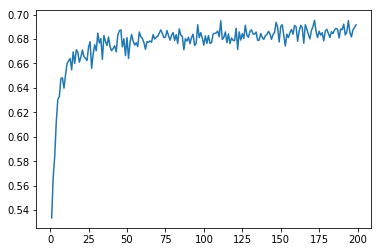

In [59]:
import matplotlib.pyplot as plt
plt.plot( range(1,200), results_test)
plt.show()

In [60]:
max(results_test)

0.6953382650542154

In [64]:
for n in range(1,200):
    results_train.append(bagging(n, X_train, y_train, X_train, y_train))

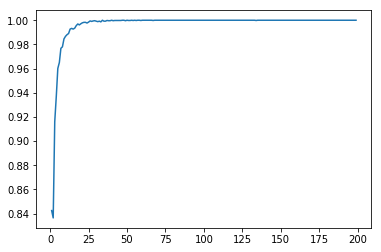

In [66]:
plt.plot( range(1,200), results_train)
plt.show()

Se observa como los resultados para el entrenamiento son óptimos sobre los 25 árboles, no se obtienen resultados de 1 con menos pues la misma técnica altera los datos de entrada al utilizar bootstrap lo que modifica los datos de entrenamiento.

En el caso no regularizado con el conjunto de test se obtienen mejores resultados que un solo árbol hasta 8 puntos de mejora en los resultados. Además es importante mencionar que esta técnica mejora sus resultados mientras mas variados son los datos por lo que no se observa overfiting.

A continuación se realizan las mismas pruebas con entradas regularizadas.

In [28]:
results_test = list()
results_train = list()
X_train,X_test,y_train,y_test = train_test_split(df, y, test_size=0.20)
std = StandardScaler()
std.fit(X_train)
X_train = std.transform(X_train)
X_test = std.transform(X_test)

for n in range(1,200):
    results_test.append(bagging(n, X_train, y_train, X_test, y_test))


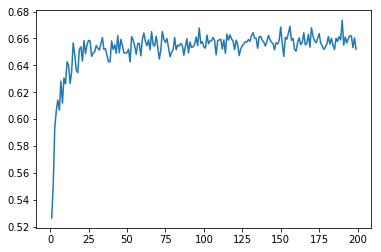

In [29]:
plt.plot( range(1,200), results_test)
plt.show()

In [30]:
max(results_test)

0.673550586329171

In [69]:
for n in range(1,200):
    results_train.append(bagging(n, X_train, y_train, X_train, y_train))

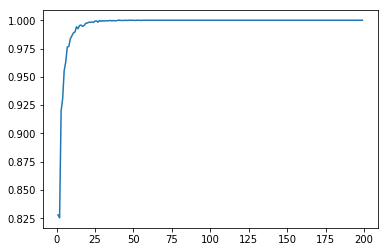

In [70]:
plt.plot( range(1,200), results_train)
plt.show()

Se encuentran mejores resultados para el caso no regularizado, aunque no significativamente mejores, esto puede explicarse considerando que la variabiliadad de los datos es poca, es decir los rangos son bastante acotados, por lo tanto este ejemplo resulta poco útil para la implementación de bagging, que considera una alta varianza de los datos. Por esto los resultados obtenidos podrían mejorar o empeorar levemente implementando regularización, esto se adjudica a este conjunto de datos epecífico.

> e) Entrene un ensamblado de árboles de múltiples niveles, mediante la técnica de AdaBoost, compare el Árbol no regularizado con el regularizado (seteando los hiper-parámetros en base a lo experimentado anteriormente en c) ¿Se visualiza overfitting? ¿Qué técnica se utiliza, re-muestrear o pesar ejemplos? ¿Qué le parece más sensato?. Varíe la cantidad de árboles de decisión utilizados en el ensamblado (n estimators), realice un gráfico resumen del F1-score de entrenamiento y de pruebas en función de este hiper-parámetro. Compare y analice con la técnica utilizada en d).

In [6]:
from sklearn.ensemble import AdaBoostClassifier

def adaboost(n, X_train, y_train, X_test, y_test ):
    model = AdaBoostClassifier(base_estimator=Tree(max_depth=None), n_estimators=n)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return f1_score(y_test, y_pred, average ='weighted')

En este caso se utiliza una técnica centrada en dar o quitar pesos a los a los ejemplos considerando si hubieron errores de clasificación, tambien cada clasificador tiene un peso asociado a un voto para clasificar un dato según su desempeño al entrenar. En este caso todos los clasificadores son árboles, la diferencia serán los pesos de los datos nuevo con los que se entrenan.

In [11]:
import warnings
warnings.filterwarnings('ignore')

results_test = list()
results_train = list()
X_train,X_test,y_train,y_test = train_test_split(df, y, test_size=0.20)

for n in range(1,200):
    results_test.append(adaboost(n, X_train, y_train, X_test, y_test))

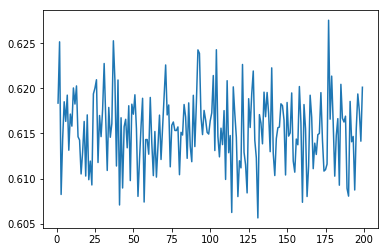

In [12]:
import matplotlib.pyplot as plt
plt.plot( range(1,200), results_test)
plt.show()

In [13]:
max(results_test)

0.6275499888582405

In [19]:
for n in range(1,200):
    results_train.append(adaboost(n, X_train, y_train, X_train, y_train))

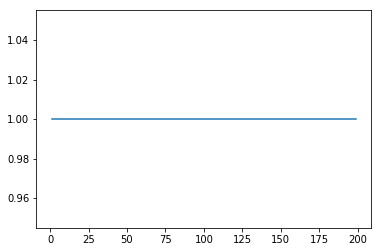

In [20]:
plt.plot( range(1,200), results_train)
plt.show()

Los resultados entregados en "train" son ideales, es decir se ajustan los learner a los datos de entrenamiento, no obstante tambien existen resultados positivos para "test" muy similares a los de boosting no regularizado, por lo que no hay overfiting.

Se espera que los resultados no sean considerablemente mejores considerando que estamos ensamblando siempre el mismo árbol de clasificación, idealmente se usarían distintos learners con el fin de mejorar resultados guiandose por los votos del que tiene mejor desempeño.

> A continuación probamos el caso regularizado de los datos con adaboost para ver si encontramos mejores resultados.

In [14]:
X_train,X_test,y_train,y_test = train_test_split(df, y, test_size=0.20)
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(X_train)
X_train = std.transform(X_train)
X_test = std.transform(X_test)

In [15]:
results_test = list()
for n in range(1,200):
    results_test.append(adaboost(n, X_train, y_train, X_test, y_test))

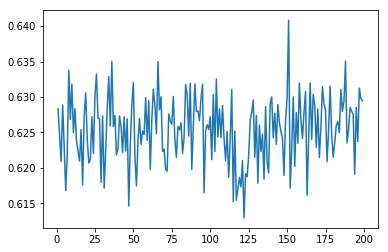

In [16]:
plt.plot( range(1,200), results_test)
plt.show()

In [17]:
max(results_test)

0.6408317930791924

Los resultados para el caso regularizado son muy similares independiente de la cantidad de árboles que se usan, en este caso la regularización no mejoró los resultados, aunque entregan una respuesta no demasiado mala y poco variable.

> f) Pruebe otra técnica de ensamblado dedicada a árboles de decisión, que combina el muestreo boostrap de Bagging con muestreo sobre las features: Random Forest, compare el Árbol no regularizado con el regularizado ¿Se visualiza overfitting?. Varíe la cantidad de árboles de decisión utilizados en el ensamblado (n estimators), realice un gráfico resumen el F1-score de entrenamiento y de pruebas en función de este hiper-parámetro.

Creamos la función random forest para n árboles, y seteamos la profundidad máxima como 1, es decir hasta que quede una hoja o dato en el nivel.

La característica principal de random forest es que busca obtener mejores resultados variando las dimensiones cuando esta generando split distintos y aumentando el número de árboles.

In [18]:
from sklearn.ensemble import RandomForestClassifier

def random_forest(n, X_train, y_train, X_test, y_test ):
    model = RandomForestClassifier(n_estimators=n, max_depth=None,n_jobs=-1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return f1_score(y_test, y_pred, average ='weighted')


In [19]:
results_test = list()
results_train = list()
X_train,X_test,y_train,y_test = train_test_split(df, y, test_size=0.20)

for n in range(1,200):
    results_test.append(random_forest(n, X_train, y_train, X_test, y_test))

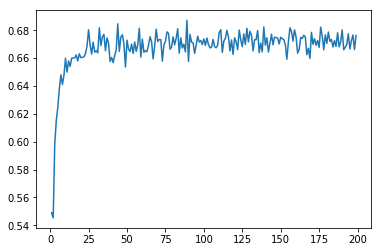

In [21]:
plt.plot( range(1,200), results_test)
plt.show()

In [20]:
max(results_test)

0.6871535044967995

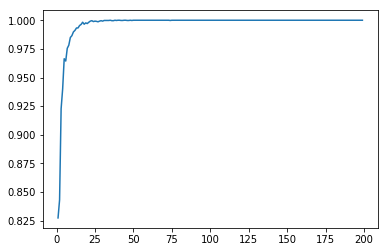

In [13]:
for n in range(1,200):
    results_train.append(random_forest(n, X_train, y_train, X_train, y_train))
plt.plot( range(1,200), results_train)
plt.show()

Se obtienen buenos resultados para random forest, aunque no son significativamente mejores que en las técnicas anteriores, esto puede explicarse con el hecho que la cantidad de varables son solo 11 por lo que los árboles que se construyen son poco variados. Para entrenamientos se obtienen resultados óptimos sobre los 20 árboles.

> A continuación veremos el caso regularizado de random forest

In [22]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(X_train)
X_train = std.transform(X_train)
X_test = std.transform(X_test)

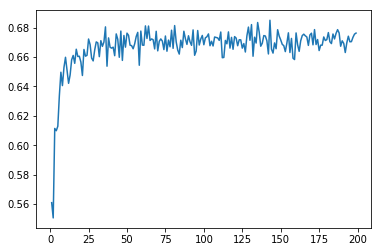

In [23]:
results_test = list()
for n in range(1,200):
    results_test.append(random_forest(n, X_train, y_train, X_test, y_test))
plt.plot( range(1,200), results_test)
plt.show()

In [25]:
max(results_test)

0.6850631136072399

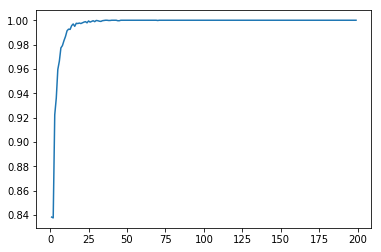

In [18]:
results_train = list()
for n in range(1,200):
    results_train.append(random_forest(n, X_train, y_train, X_train, y_train))
plt.plot( range(1,200), results_train)
plt.show()

En el caso regularizado de random forest no se encuentran resultados significativamente mejores que en las técnicas anteriores, otra vez esta técnica depende de la convarianza de las características y no de la escala de los datos.

> g) Verifique que el OOB error (out of bag error) de los ensambladores que utilizan la técnica boostrap puede ser una alternativa como métrica de generalización, compárelo con el error calculado sobre el conjunto de pruebas y validación (o en su defecto cross validation).

Como mencionamos inicialemente no trabajamos con un conjunto de validación dada la cantidad de datos, por lo que se omiten estos resultados, a continuación se  utiliza OOB sobre el modelo random forest ajustado a los datos de entrenamiento.

In [25]:
X_train,X_test,y_train,y_test = train_test_split(df, y, test_size=0.20)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=150, max_depth=None,n_jobs=-1, oob_score=True)
model.fit(X_train, y_train)
oob_error = 1 - model.oob_score
test_error = 1- model.score(X_test,y_test)
#val_error = 1- model.score(X_val,y_val)
print("OOB error: ",oob_error)
#print ("Val error: ",val_error)
print("Test error: ",test_error)

OOB error:  0
Test error:  0.2992307692307692


Se oserva que los resultados para oob son muy buenos con un error de 0, mientras que la predicción normal arroja hasta un %30 de error sobre el conjunto de pruebas.

> h) Entrene alguna otra máquina de aprendizaje, elegida por usted de entre todas las vistas en el curso, para resolver el problema. Elija los hiper-parámetros que estime convenientes intentando aumentar el F1-score obtenido por los algoritmos anteriores ¿Se logra una mejora? ¿Por qué?

Intentamos encontrar mejores resultados con una máquina SVM extendida a múltiples clases, variamos el hiperparámetro "C" con el fin de mejorar resultados.

In [31]:
from sklearn.svm import SVC as SVM #SVC is for classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import f1_score

def svm( C, X_train, y_train, X_test, y_test ):
    model = SVM()
    model.set_params( C=C, kernel='rbf' )
    meta_model = OneVsRestClassifier( model )
    meta_model.fit( X_train, y_train )
    y_pred = meta_model.predict( X_test )
    return f1_score(y_test, y_pred, average ='weighted')


In [32]:
results = list()
cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]

X_train,X_test,y_train,y_test = train_test_split(df, y, test_size=0.20)
std = StandardScaler()
std.fit(X_train)
X_train = std.transform(X_train)
X_test = std.transform(X_test)

for c in cs:
    results.append( svm(c, X_train, y_train, X_test, y_test) )

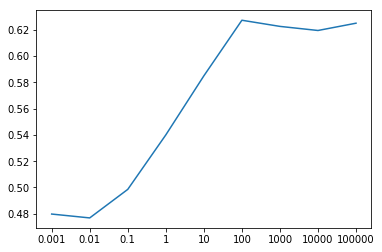

In [33]:
plt.plot( ["0.001", "0.01", "0.1", "1", "10", "100", "1000", "10000","100000"], results)

plt.show()

In [34]:
max(results)

0.6273438213333417

Como resultado los valores entregadosn son iguales para c grandes e inferiores en los primeros C, y ninguno de ellos logra superar  ninguna de las técnicas de ensamblado.

> i) Compare y analice las distintas maneras con las que se resolvió el problema definido en b), por ejemplo incluya las decisiones que conlleva y los resultados que reflejan.

Como conclusion común para todas las técnicas se demuestra que los resultados mejoran considerablemente cuando se existe un "consenso" entre las máquinas sobre cuál es la clase de un dato, es análogo a pensar que muchas máquina piensan mejor que una. 
Ahora bien las principales decisiones que se deben tomar son, regularizar o no los datos de entrada, aunque las técnicas de boosting dependen de la varianza de estos, no se asegura que los resultados sean peores por regularizar, esto dependera del ejemplo. Es importante comprobar si la técnica produce  o no overfiting y nos encontramos con que aunque estas máquinas procesan una y otra vez los mismos datos, no se genera overfiting sino todo lo contrario, se mejorar los resultados para las pruebas.

Como resultado mostramos los máximos valores encontrados al variar la cantidad de máquinas en las 3 técnicas de ensamblado utilizadas con la métrica F-score:

          Bagging no regularizado: 0.6953382650542154                  Bagging regularizado: 0.6850631136072399
         Adaboost no regularizado: 0.6275499888582405                 Adaboost regularizado: 0.6408317930791924
    Random forest no regularizado: 0.6871535044967995            Random forest regularizado: 0.6850631136072399
    
El mejor fue bagging no regularizado, lo que tiene sentido ya que existe una vaierdad esperable de datos, adaboost entrena secuencialmente el mismo modelo que tiene un alcance limitado, por otro lado aunque random forest entrega buenos resultados, estos no son mejores considerando la poca variabilidad de la cantidad de características.

<a id="segundo"></a>
## 2. Redes Convolucionales sobre imágenes
---
Las redes neuronales hoy en día han sido extendidas a numerosas aplicaciones gracias a la arquitectura definida para cada tipo de problema. Las redes neuronales que aplican la operación de convolución [[3]](#refs) o convoluciones en sus capas son concidas como *CNN* o *ConvNets*, lo cual se especializa en trabajar en datos con forma matricial (ya sea bi-dimensional o tri-dimensional), lo cual se adecúa perfectamente a imágenes (matrices), ya que gracias a su conectividad local se especializan en reconocer patrones sobre los datos de manera espacial, como refleja la siguiente imagen:

<img src="https://cdn-images-1.medium.com/max/1600/1*N4h1SgwbWNmtrRhszM9EJg.png" title="Title text" width="90%" />


En esta actividad trabajará con un extracto bastante pequeño del dataset conocido como **101-Food**[[4]](#refs), el cual consta de mil imágenes pertenecientes a 3 clases (*Hambuger, Hot Dog* y *Pizza*) separados en conjunto de entrenamiento y validación.  
El extracto pequeño del dataset con el que se trabajará deberá ser descargado del siguiente __[link](https://www.dropbox.com/s/56xqazmhbh0doi7/food_data.zip?dl=0)__ a través de Dropbox.

> a) Construya funciones para leer los datos y cargarlos al momento de entrenar (durante cada *epoch*), para ésto utilice *Image Data Generator* de keras.
```python
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255) #no transformation
train_generator = train_datagen.flow_from_directory(
        'food_data/train',
        target_size=(150, 150),
        color_mode='rgb',
        batch_size=32)
validation_generator = test_datagen.flow_from_directory(
        'food_data/val',
        target_size=(150, 150),
        color_mode='rgb',
        batch_size=32)
```

In [1]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255) #no transformation
train_generator = train_datagen.flow_from_directory(
        'food_data/train',
        target_size=(150, 150),
        color_mode='rgb',
        batch_size=32)
validation_generator = test_datagen.flow_from_directory(
        'food_data/val',
        target_size=(150, 150),
        color_mode='rgb',
        batch_size=32)

C:\Users\Palomo\Anaconda3\envs\py36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Found 2400 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


Los datos se guardan en la forma de tuplas (x,y), donde x contiene la información de la foto (pixeles, en este caso las fotos son reducidas a 150x150 pixeles de 3 canales, es decir RGB) e y contiene el label apropiado, para este caso y tiene tres labels (clases): "hamburger", "hot_dog" y "pizza". En el dataset original hay imágenes que contienen cierta cantidad de ruido, es decir hay algunos pixeles con colores mas intensos o imágenes mal clasificadas. Al mirar el dataset hot_dog reducido se encuentra una imagen que es solo una persona sin contener ningún tipo de comida, por lo que se asume que los dataset reducidos tambien tienen cierta cantidad de ruido. 

> b) Utilice la red tradicional (*Feed Forward*) entregada en el código para ser entrenada sobre los datos vectorizados, esto es que cada imagen queda representada como un vector gigante, y las 3 clases a las que se enfrenta. Evalúe el modelo con la métrica *accuracy* sobre el conjunto de validación.
```python
from keras.models import Sequential
from keras.layers import *
model = Sequential()
model.add(Flatten(input_shape=train_generator.image_shape)) #full dense
model.add(BatchNormalization()) #to normalize the input..
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu')) #128
model.add(Dropout(0.25))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']) # Let's train the model using RMSprop
model.summary()
model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator.classes)//train_generator.batch_size, #samples//batch_size
        epochs=25,
        validation_data=validation_generator,
        validation_steps=len(validation_generator.classes)//validation_generator.batch_size)
print("Accuracy validation: ",model.evaluate_generator(generator=validation_generator)[1])
```

In [3]:
from keras.models import Sequential
from keras.layers import *
model = Sequential()
model.add(Flatten(input_shape=train_generator.image_shape)) #full dense
model.add(BatchNormalization()) #to normalize the input..
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu')) #128
model.add(Dropout(0.25))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']) # Let's train the model using RMSprop
model.summary()
model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator.classes)//train_generator.batch_size, #samples//batch_size
        epochs=25,
        validation_data=validation_generator,
        validation_steps=len(validation_generator.classes)//validation_generator.batch_size)
print("Accuracy validation: ",model.evaluate_generator(generator=validation_generator, steps = len(validation_generator.classes)//validation_generator.batch_size)[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 67500)             0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 67500)             270000    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               17280256  
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 387       
Total para

KeyboardInterrupt: 

Accuracy validation:  0.4876760571775302

La red feed forward creada consta de varias capas:
- Primero se usa una capa Flatten porque la entrada son matrices que contienen los pixeles de la imagen, una red feed forward no puede recibir un input en forma de matriz, debe ser en forma de vectores, por lo tanto Flatten se encarga transformar la matriz de entrada de dimensiones 150x150 (cada entrada de la matriz es de 3 canales para representar los pixeles, es decir RGB), en un vector de tamaño 150x150x3 = 67500.
- BatchNormalization se encarga de normalizar el input de la forma clasica (mean = 0, std = 1).
- Capa densa de 256 neuronas.
- Dropout "apaga" un % de neuronas durante el entrenamiento para evitar overfitting.
- Otra capa densa de 128 neuronas.
- Otro dropout.
- La ultima capa densa contiene 3 neuronas debido a que hay 3 clases en el modelo, además su activación es la función softmax que se usa generalmente en problemas de clasificación.

La función de pérdida utilizada es categorical crossentropy (usada para problemas de clasificación), y el optimizador usado es rmsprop, que según la documentación de keras es mejor para redes neuronales recurrentes.

> c) Utilice la red convolucional (**CNN**) entregada en el código para ser entrenada sobre los datos brutos, matrices RGB de píxeles, y las 3 clases a las que se enfrenta. Evalúe el modelo con la métrica *accuracy* sobre el conjunto de validación. Compare.
```python
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=train_generator.image_shape,activation='relu'))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5)) 
model.add(Dense(len(train_generator.class_indices),activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']) # Let's train the model using RMSprop
model.summary()
model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator.classes)//train_generator.batch_size, #samples//batch_size
        epochs=25,
        validation_data=validation_generator,
        validation_steps=len(validation_generator.classes)//validation_generator.batch_size)
```

In [7]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=train_generator.image_shape,activation='relu'))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5)) 
model.add(Dense(len(train_generator.class_indices),activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']) # Let's train the model using RMSprop
model.summary()
model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator.classes)//train_generator.batch_size, #samples//batch_size
        epochs=25,
        validation_data=validation_generator,
        validation_steps=len(validation_generator.classes)//validation_generator.batch_size)
print("Accuracy validation: ",model.evaluate_generator(generator=validation_generator, steps = len(validation_generator.classes)//validation_generator.batch_size)[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 148, 148, 32)      9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 74, 74, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
__________

In [8]:
from sklearn.metrics import confusion_matrix 
Y_pred = model.predict_generator(validation_generator,len(validation_generator.classes)//validation_generator.batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
confusion_matrix = confusion_matrix(validation_generator.classes, y_pred)
print(confusion_matrix)

[[60 78 62]
 [67 63 70]
 [68 68 64]]


Accuracy validation:  0.6883802816901409

La red convolucional puede recibir matrices de entrada, luego puede obtener features de la imagen, para finalmente funcionar como una red feed forward que asigna una clase a la imagen, debido a esto la red convolucional es mejor para reconocimiento de imagenes. En la red creada, la fase de feature extraction esta en las capas Conv2D y MaxPool2D, luego se usa Flatten y Dense para la fase de clasificación (FFN), siempre usando Dropout para evitar overfit.

> d) Genere un conjunto datos con incorrecta etiquetación de manera manual y vea si el modelo convolucional se sigue comportando de la misma manera. Para esto tome 100 imágenes aleatorias de entrenamiento de la carpeta *hot dog* y 100 imágenes aleatorias de entrenamiento de la carpeta *hamburger* e intercambielas, sin manipular las imágenes de la carpeta *pizza* y con el conjunto de validación intacto. Genere las matrices de confusión en el conjunto de validación para visualizar cómo afectó al modelo la corrupción realizada a los datos.
```python
from sklearn.metrics import confusion_matrix 
Y_pred = model.predict_generator(validation_generator,len(validation_generator.classes)//validation_generator.batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
confusion_matrix = confusion_matrix(validation_generator.classes, y_pred)
```

In [4]:
train_generator = train_datagen.flow_from_directory(
        'food_data/train_incorrect',
        target_size=(150, 150),
        color_mode='rgb',
        batch_size=32)

model2 = Sequential()
model2.add(Conv2D(32, (3, 3), padding='same',input_shape=train_generator.image_shape,activation='relu'))
model2.add(Conv2D(32, (3, 3),activation='relu'))
model2.add(MaxPool2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
model2.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
model2.add(Conv2D(64, (3, 3),activation='relu'))
model2.add(MaxPool2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(128,activation='relu'))
model2.add(Dropout(0.5)) 
model2.add(Dense(len(train_generator.class_indices),activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']) # Let's train the model using RMSprop
model2.summary()
model2.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator.classes)//train_generator.batch_size, #samples//batch_size
        epochs=25,
        validation_data=validation_generator,
        validation_steps=len(validation_generator.classes)//validation_generator.batch_size)
print("Accuracy validation: ",model2.evaluate_generator(generator=validation_generator, steps = len(validation_generator.classes)//validation_generator.batch_size)[1])

from sklearn.metrics import confusion_matrix 
Y_pred = model2.predict_generator(validation_generator,len(validation_generator.classes)//validation_generator.batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
confusion_matrix = confusion_matrix(validation_generator.classes, y_pred)

Found 2400 images belonging to 3 classes.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 148, 148, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 74, 74, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None

Accuracy validation:  0.6778169005689486

In [5]:
from sklearn.metrics import confusion_matrix 
Y_pred = model2.predict_generator(validation_generator,len(validation_generator.classes)//validation_generator.batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
confusion_matrix = confusion_matrix(validation_generator.classes, y_pred)
print(confusion_matrix)

[[61 54 85]
 [59 59 82]
 [67 62 71]]


Al revisar ambas matrices de confusion, no pareciera haber una gran diferencia al comportamiento de la CNN, el mayor cambio pareciera ser que ahora la CNN es más propensa a predecir que la imagen sea pizza, probablemente debido a que encontro más features coincidentes en esa clase que en las demás, pero en general se mantuvo con la misma precisión.

<a id="refs"></a>
## Referencias
[1] http://archive.ics.uci.edu/ml/datasets/Wine+Quality  
[2] http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html  
[3] http://deeplearning.net/software/theano/tutorial/conv_arithmetic.html, http://colah.github.io/posts/2014-07-Understanding-Convolutions/    
[4] https://www.vision.ee.ethz.ch/datasets_extra/food-101/  
[5] Box, G. E. P., Jenkins, G. M. and Reinsel, G. C. (1976), *Time Series Analysis, Forecasting and Control*. Third Edition. Holden-Day. Series G.  